# 1. Business Understanding


# 2. Data Collection dan Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kuliah/all.csv', sep='|')

df.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34746 non-null  int64  
 1   job_title             34746 non-null  object 
 2   location              34746 non-null  object 
 3   salary_currency       34742 non-null  object 
 4   career_level          34746 non-null  object 
 5   experience_level      30205 non-null  object 
 6   education_level       34746 non-null  object 
 7   employment_type       33402 non-null  object 
 8   job_function          34746 non-null  object 
 9   job_benefits          27330 non-null  object 
 10  company_process_time  24555 non-null  object 
 11  company_size          29103 non-null  object 
 12  company_industry      33132 non-null  object 
 13  job_description       34745 non-null  object 
 14  salary                9352 non-null   float64
dtypes: float64(1), int6

In [ ]:
df.describe()

,id,salary
count,34746.000000,9.352000e+03
mean,17373.500000,7.358879e+06
std,10030.450563,2.148128e+07
min,1.000000,1.000000e+01
25%,8687.250000,4.250000e+06
50%,17373.500000,5.500000e+06
75%,26059.750000,8.000000e+06
max,34746.000000,2.000000e+09


# 3. Data Preparation dan Cleaning

## Drop Kolom yang tidak dibutuhkan


In [ ]:
df = df.drop(['job_benefits', 'job_description'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34746 non-null  int64  
 1   job_title             34746 non-null  object 
 2   location              34746 non-null  object 
 3   salary_currency       34742 non-null  object 
 4   career_level          34746 non-null  object 
 5   experience_level      30205 non-null  object 
 6   education_level       34746 non-null  object 
 7   employment_type       33402 non-null  object 
 8   job_function          34746 non-null  object 
 9   company_process_time  24555 non-null  object 
 10  company_size          29103 non-null  object 
 11  company_industry      33132 non-null  object 
 12  salary                9352 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 3.4+ MB


## Value kosong pada experience_level diubah menjadi 0 tahun

In [ ]:
df['experience_level'] = df['experience_level'].fillna('0 tahun')
df.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,company_process_time,company_size,company_industry,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",25 days,51 - 200 pekerja,Manajemen/Konsulting HR,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",30 days,51 - 200 pekerja,Umum & Grosir,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan",21 days,2001 - 5000 pekerja,Retail/Merchandise,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",23 days,201 - 500 pekerja,Manajemen/Konsulting HR,NaN


## Cek missing value

In [ ]:
print("\n3.1 Missing Values Analysis:")
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)
print(missing_df)


3.1 Missing Values Analysis:
                  Column  Missing Count  Missing Percentage
12                salary          25394           73.084672
9   company_process_time          10191           29.329995
10          company_size           5643           16.240718
11      company_industry           1614            4.645139
7        employment_type           1344            3.868071
3        salary_currency              4            0.011512


## Handle missing value

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6065 entries, 5 to 34745
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6065 non-null   int64  
 1   job_title             6065 non-null   object 
 2   location              6065 non-null   object 
 3   salary_currency       6065 non-null   object 
 4   career_level          6065 non-null   object 
 5   experience_level      6065 non-null   object 
 6   education_level       6065 non-null   object 
 7   employment_type       6065 non-null   object 
 8   job_function          6065 non-null   object 
 9   company_process_time  6065 non-null   object 
 10  company_size          6065 non-null   object 
 11  company_industry      6065 non-null   object 
 12  salary                6065 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 663.4+ KB


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6065 entries, 5 to 34745
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6065 non-null   int64  
 1   job_title             6065 non-null   object 
 2   location              6065 non-null   object 
 3   salary_currency       6065 non-null   object 
 4   career_level          6065 non-null   object 
 5   experience_level      6065 non-null   object 
 6   education_level       6065 non-null   object 
 7   employment_type       6065 non-null   object 
 8   job_function          6065 non-null   object 
 9   company_process_time  6065 non-null   object 
 10  company_size          6065 non-null   object 
 11  company_industry      6065 non-null   object 
 12  salary                6065 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 663.4+ KB


## Menyederhanakan Kategori Pendidikan

In [ ]:
df['education_level'].value_counts()

,count
education_level,
Sarjana (S1),1948
"Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)",1139
Tidak terspesifikasi,845
"SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)",654
"SMA, SMU/SMK/STM",349
"Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)",324
"Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)",298
"Sertifikat Professional, D3 (Diploma), D4 (Diploma)",294
"SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma)",111


In [ ]:
def kategori_terendah(teks):
    teks = teks.lower()
    if 'tidak terspesifikasi' in teks:
        return 'Tidak Terspesifikasi'
    elif 'sma' in teks or 'smk' in teks:
        return 'SMA/SMK'
    elif 'd3' in teks or 'd4' in teks:
        return 'Diploma (D3/D4)'
    else:
        return 'Sarjana (S1)'

df['education_level'] = df['education_level'].apply(kategori_terendah)

df['education_level'].value_counts()


,count
education_level,
Sarjana (S1),2323
Diploma (D3/D4),1736
SMA/SMK,1161
Tidak Terspesifikasi,845


## Menyederhanakan kategori employment_type

In [ ]:
df['employment_type'].value_counts()

,count
employment_type,
Penuh Waktu,5142
Kontrak,832
Paruh Waktu,43
Magang,27
Temporer,11
"Penuh Waktu, Kontrak",5
"Penuh Waktu, Paruh Waktu",2
"Kontrak, Temporer",2
"Penuh Waktu, Magang",1


In [ ]:
def simplify_employment(teks):
    """Simplikasi employment type ke kategori utama"""
    teks = teks.lower()

    # Jika ada multiple employment type, ambil yang pertama/utama
    if ',' in teks:
        teks = teks.split(',')[0].strip()

    # Mapping ke kategori utama
    if 'penuh waktu' in teks:
        return 'Penuh Waktu'
    elif 'kontrak' in teks:
        return 'Kontrak'
    elif 'paruh waktu' in teks:
        return 'Paruh Waktu'
    elif 'magang' in teks:
        return 'Magang'
    elif 'temporer' in teks:
        return 'Temporer'
    else:
        return 'Lainnya'

# Aplikasikan fungsi
df['employment_type'] = df['employment_type'].apply(simplify_employment)

In [ ]:
df['employment_type'].value_counts()

,count
employment_type,
Penuh Waktu,5150
Kontrak,834
Paruh Waktu,43
Magang,27
Temporer,11


## Ubah Pengalaman menjadi Range Tahun

In [ ]:
df['experience_level'].value_counts()

,count
experience_level,
1 tahun,1959
2 tahun,1664
3 tahun,1111
5 tahun,592
0 tahun,447
4 tahun,130
10 tahun,64
7 tahun,39
8 tahun,29


In [ ]:
# Opsi 1: Menggunakan regex (paling efisien)
import re

def kategori_terendah(teks):
    teks = teks.lower()
    match = re.search(r'(\d+)', teks)
    if match:
        tahun = int(match.group(1))
        return min(tahun, 20)  # Maksimal 20
    return 20

df['experience_years'] = df['experience_level'].apply(kategori_terendah)
df['experience_years'].value_counts()

,count
experience_years,
1,1959
2,1664
3,1111
5,592
0,447
4,130
10,64
7,39
8,29


In [ ]:
def get_experience_group(tahun):
    if tahun <= 1:
        return '0-1'
    elif tahun <= 3:
        return '2-3'
    elif tahun <= 5:
        return '4-5'
    elif tahun <= 10:
        return '6-10'
    else:
        return '>10'

df['experience_group'] = df['experience_level'].apply(kategori_terendah).apply(get_experience_group)
df['experience_group'].value_counts()

,count
experience_group,
2-3,2775
0-1,2406
4-5,722
6-10,148
>10,14


## Membuat Semua currency Menjadi Rupiah

In [ ]:
df['career_level'].value_counts()

,count
career_level,
Pegawai (non-manajemen & non-supervisor),3717
Supervisor/Koordinator,1022
Manajer/Asisten Manajer,797
Lulusan baru/Pengalaman kerja kurang dari 1 tahun,471
CEO/GM/Direktur/Manajer Senior,58


In [ ]:
df['salary_currency'].value_counts()

,count
salary_currency,
IDR,6064
USD,1


In [ ]:
def change_currency(row):
    if row['salary_currency'] == 'IDR':
        return row['salary']
    else:
        # kurs asumsi 1 USD = 16.615 IDR
        row['salary_currency'] = 'IDR'
        return row['salary'] * 16615

# Terapkan fungsi ke setiap baris
df['salary'] = df.apply(change_currency, axis=1)

df['salary_currency'] = 'IDR'
df.head()


,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,company_process_time,company_size,company_industry,salary,experience_years,experience_group
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,0 tahun,Diploma (D3/D4),Penuh Waktu,"Manufaktur,Manufaktur",18 days,51 - 200 pekerja,Manufaktur/Produksi,10500000.0,0,0-1
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3 tahun,Diploma (D3/D4),Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,8000000.0,3,2-3
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Diploma (D3/D4),Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",29 days,1- 50 pekerja,Elektrikal & Elektronik,5250000.0,2,2-3
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2 tahun,Tidak Terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",15000000.0,2,2-3
31,32,PPIC,Tangerang,IDR,Manajer/Asisten Manajer,5 tahun,Sarjana (S1),Penuh Waktu,"Manufaktur,Manufaktur",21 days,201 - 500 pekerja,Manufaktur/Produksi,6600000.0,5,4-5


# 4. EDA

## Distribusi Gaji

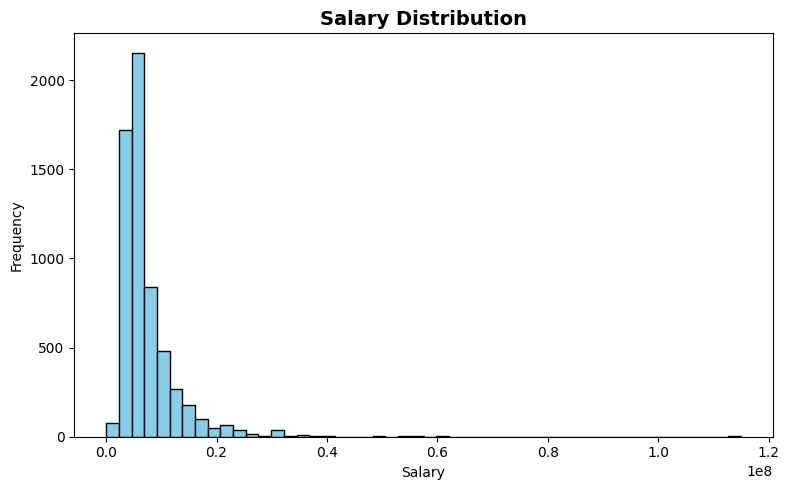

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['salary'], bins=50, color='skyblue', edgecolor='black')
plt.title('Salary Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('salary_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Gaji vs Pengalaman

<Figure size 800x500 with 0 Axes>

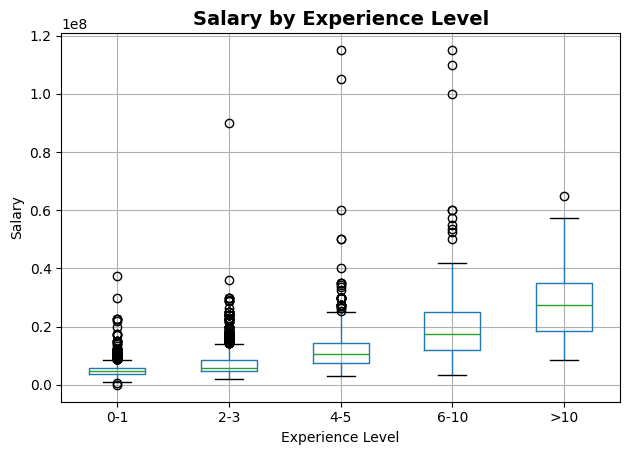

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column='salary', by='experience_group')
plt.title('Salary by Experience Level', fontsize=14, fontweight='bold')
plt.suptitle('')  # hilangkan suptitle default dari pandas boxplot
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.tight_layout()
plt.savefig('salary_by_career_level.png', dpi=300, bbox_inches='tight')
plt.show()

## Distribusi TIngkat Pendidikan

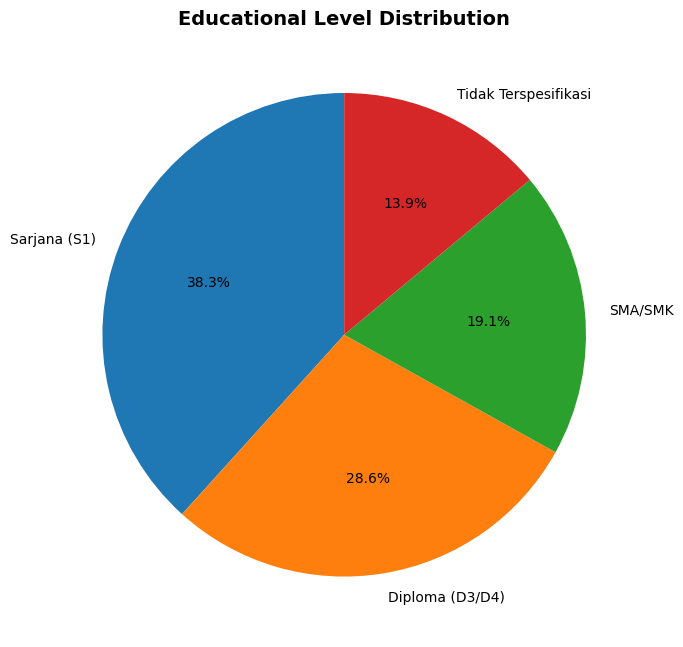

In [ ]:
plt.figure(figsize=(7, 7))
emp_dist = df['education_level'].value_counts()
plt.pie(emp_dist.values, labels=emp_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Educational Level Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('education_level_dist.png', dpi=300, bbox_inches='tight')
plt.show()

## Sebaran Outlier Gaji

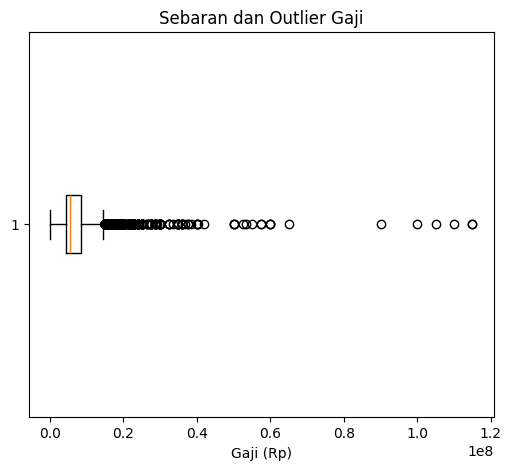

In [ ]:
plt.figure(figsize=(6,5))
plt.boxplot(df['salary'], vert=False)
plt.title('Sebaran dan Outlier Gaji')
plt.xlabel('Gaji (Rp)')
plt.show()


## Gaji Berdasarkan Rentang

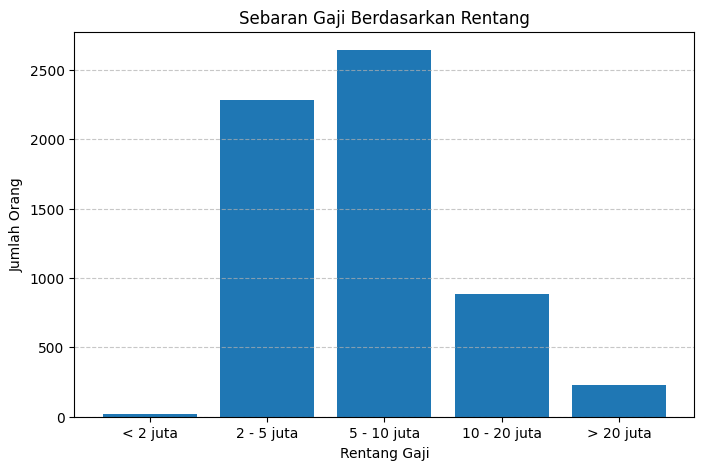

In [ ]:
# 1️⃣ Definisikan kategori gaji (bin)
bins = [0, 2000000, 5000000, 10000000, 20000000, float('inf')]
labels = ['< 2 juta', '2 - 5 juta', '5 - 10 juta', '10 - 20 juta', '> 20 juta']

# 2️⃣ Buat kolom baru berisi kategori range gaji
df['range_gaji'] = pd.cut(df['salary'], bins=bins, labels=labels, right=False)

# 3️⃣ Hitung jumlah data di setiap kategori
gaji_count = df['range_gaji'].value_counts().sort_index()

# 4️⃣ Visualisasikan dengan bar chart
plt.figure(figsize=(8,5))
plt.bar(gaji_count.index, gaji_count.values)
plt.title('Sebaran Gaji Berdasarkan Rentang')
plt.xlabel('Rentang Gaji')
plt.ylabel('Jumlah Orang')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Rata - Rata Gaji berdasarkan Tingkat Pendidikan

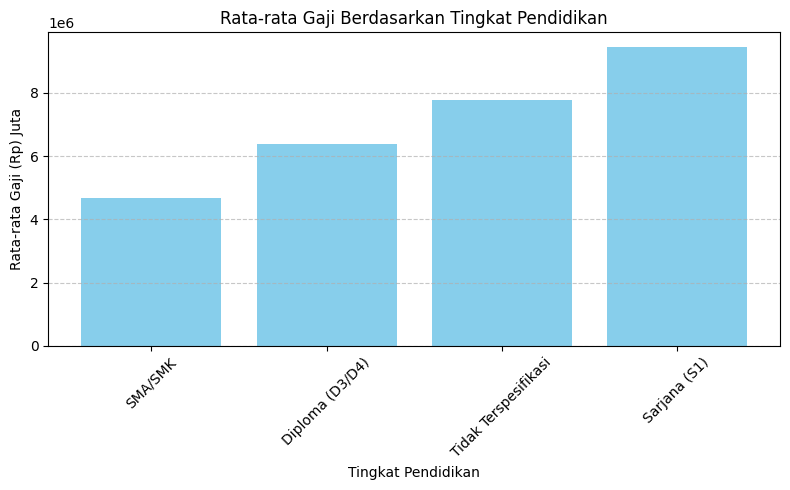

In [ ]:
# 1️⃣ Hitung rata-rata gaji untuk setiap tingkat pendidikan
avg_salary = df.groupby('education_level')['salary'].mean().sort_values()

# 2️⃣ Visualisasikan dengan bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_salary.index, avg_salary.values, color='skyblue')
plt.title('Rata-rata Gaji Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Rata-rata Gaji (Rp) Juta')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Rata-Rata Gaji Berdasarkan Pengalaman Kerja

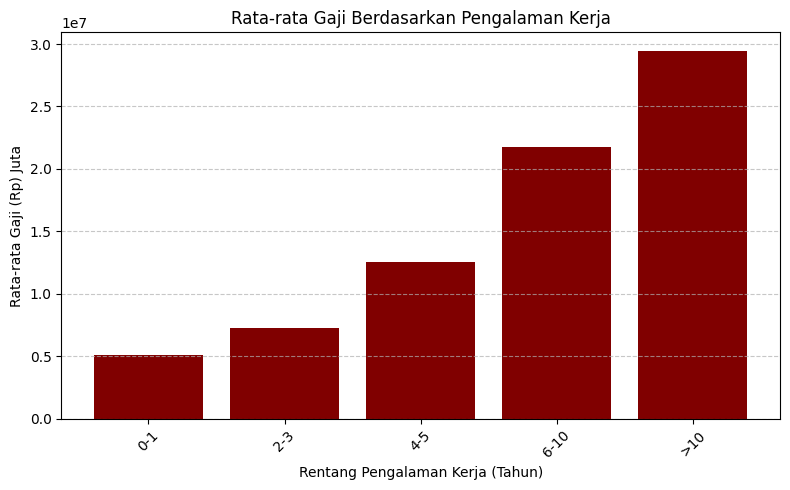

In [ ]:
# 1️⃣ Hitung rata-rata gaji untuk setiap tingkat pendidikan
avg_salary = df.groupby('experience_group')['salary'].mean().sort_values()

# 2️⃣ Visualisasikan dengan bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_salary.index, avg_salary.values, color='maroon')
plt.title('Rata-rata Gaji Berdasarkan Pengalaman Kerja')
plt.xlabel('Rentang Pengalaman Kerja (Tahun)')
plt.ylabel('Rata-rata Gaji (Rp) Juta')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top 10 Pekerjaan Terbanyak

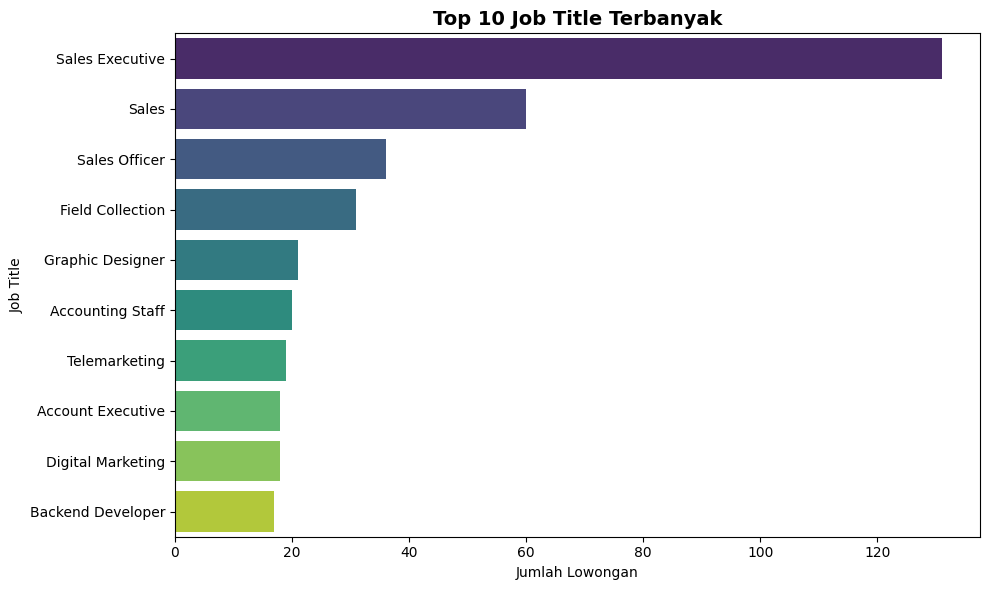

In [ ]:
# Hitung jumlah tiap job_title
top_jobs = df['job_title'].value_counts().head(10)

# Plot menggunakan seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.title('Top 10 Job Title Terbanyak', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

## Salary Competitiveness Index

In [ ]:
print("\n" + "=" * 70)
print("STATISTIK SALARY COMPETITIVENESS INDEX")
print("=" * 70)

# Deskripsi statistik keseluruhan
stats = df['salary_competitiveness_index'].describe()
print(f"\nStatistik Keseluruhan:")
print(stats.round(2))

# Breakpoint ke kategori
print(f"\nKategori Competitiveness:")
below_market = len(df[df['salary_competitiveness_index'] < 90])
market = len(df[(df['salary_competitiveness_index'] >= 90) & (df['salary_competitiveness_index'] <= 110)])
above_market = len(df[df['salary_competitiveness_index'] > 110])

print(f"• Below Market (<90):    {below_market:4d} jobs ({below_market/len(df)*100:5.1f}%)")
print(f"• Market Rate (90-110):  {market:4d} jobs ({market/len(df)*100:5.1f}%)")
print(f"• Above Market (>110):   {above_market:4d} jobs ({above_market/len(df)*100:5.1f}%)")

# Per experience group
print(f"\nPerformance per Experience Group:")
for exp_group in sorted(df['experience_group'].unique()):
    subset = df[df['experience_group'] == exp_group]
    mean_index = subset['salary_competitiveness_index'].mean()
    min_index = subset['salary_competitiveness_index'].min()
    max_index = subset['salary_competitiveness_index'].max()
    count = len(subset)
    print(f"  {exp_group:20s}: Mean={mean_index:6.1f}, Range=[{min_index:6.1f} - {max_index:6.1f}], Count={count:4d}")

# Per lokasi
print(f"\nPerformance per Location (Top 10):")
location_stats = df.groupby('location')['salary_competitiveness_index'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)
for loc, row in location_stats.iterrows():
    print(f"  {loc:30s}: Mean={row['mean']:6.1f}, Count={int(row['count']):4d}")


STATISTIK SALARY COMPETITIVENESS INDEX

Statistik Keseluruhan:
count    6065.00
mean      115.60
std        65.71
min         0.00
25%        79.17
50%       100.00
75%       132.98
max      1500.00
Name: salary_competitiveness_index, dtype: float64

Kategori Competitiveness:
• Below Market (<90):    2243 jobs ( 37.0%)
• Market Rate (90-110):  1485 jobs ( 24.5%)
• Above Market (>110):   2337 jobs ( 38.5%)

Performance per Experience Group:
  0-1                 : Mean= 107.9, Range=[   0.0 -  797.9], Count=2406
  2-3                 : Mean= 120.9, Range=[  35.0 - 1500.0], Count=2775
  4-5                 : Mean= 119.3, Range=[  28.6 - 1095.2], Count= 722
  6-10                : Mean= 124.3, Range=[  20.0 -  657.1], Count= 148
  >10                 : Mean= 107.1, Range=[  30.9 -  236.4], Count=  14

Performance per Location (Top 10):
  Manokwari                     : Mean= 797.9, Count=   1
  Lombok                        : Mean= 191.7, Count=   1
  Bangka Belitung               : Mean

## VISUALISASI SALARY COMPETITIVENESS INDEX


MEMBUAT VISUALISASI SALARY COMPETITIVENESS INDEX


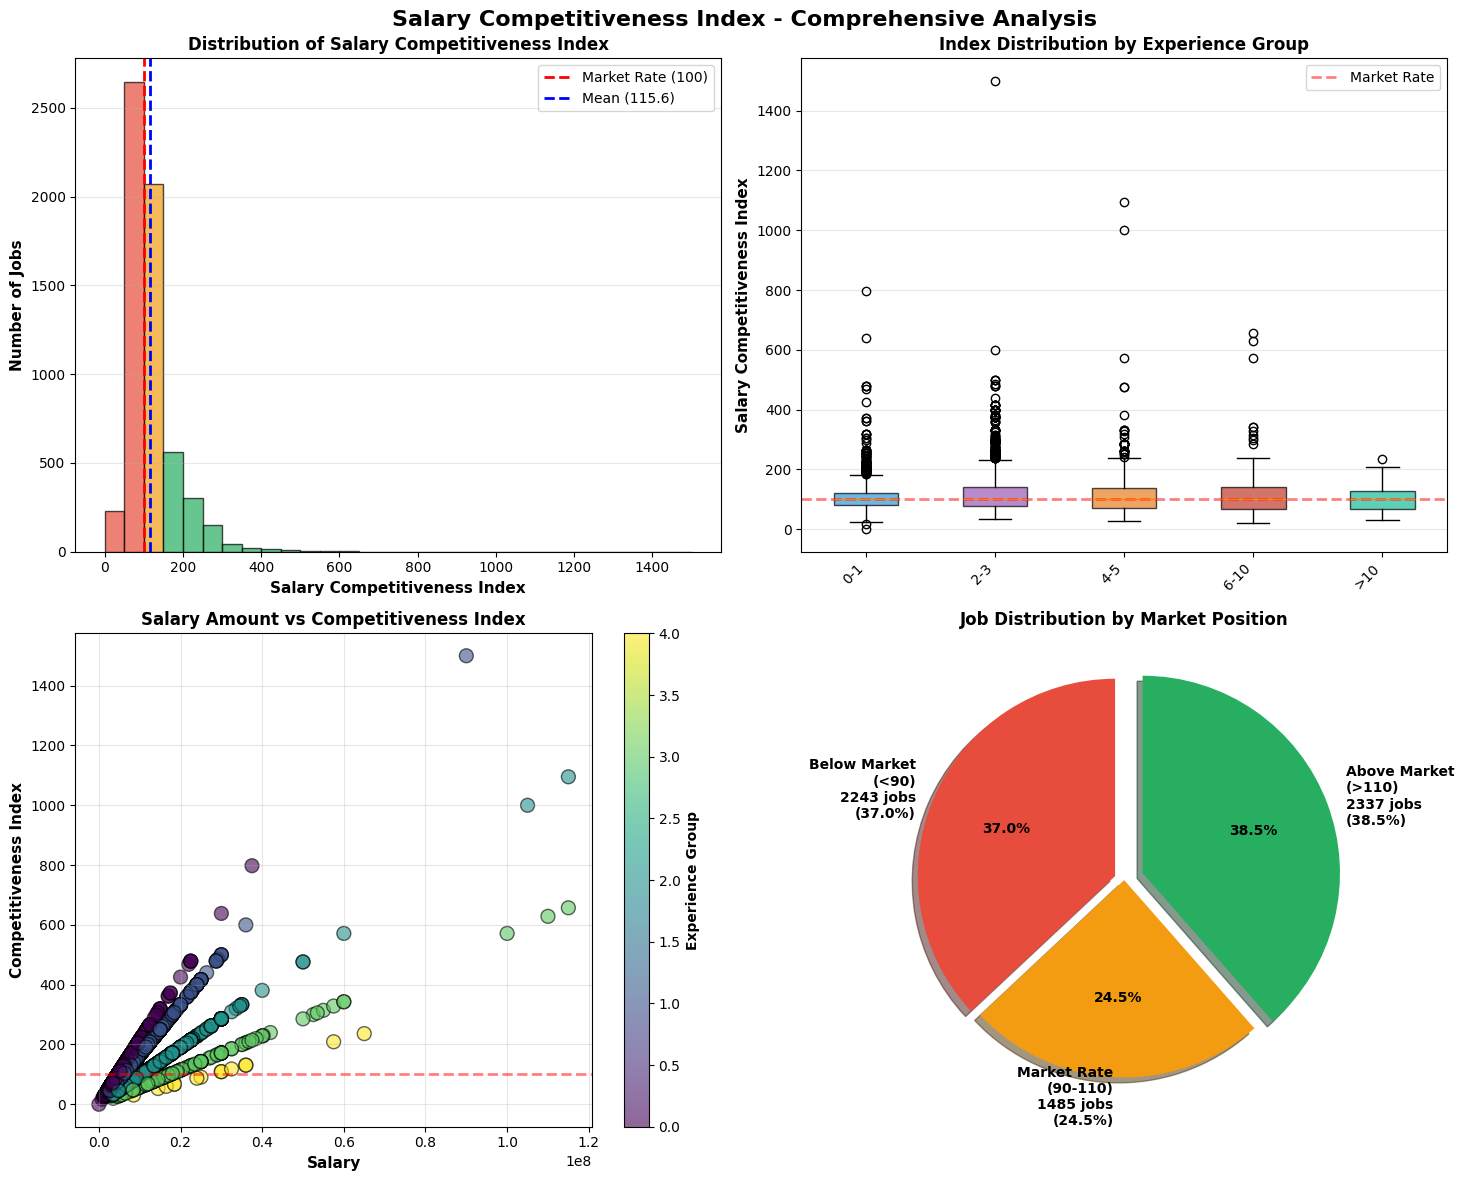

✓ Grafik 1 berhasil dibuat: salary_competitiveness_analysis.png


In [ ]:
print("\n" + "=" * 70)
print("MEMBUAT VISUALISASI SALARY COMPETITIVENESS INDEX")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Salary Competitiveness Index - Comprehensive Analysis', fontsize=16, fontweight='bold')

# Plot 1: Histogram dengan kategori
ax1 = axes[0, 0]
colors = ['#e74c3c' if x < 90 else '#f39c12' if x < 110 else '#27ae60'
          for x in pd.cut(df['salary_competitiveness_index'], bins=30).apply(lambda x: x.mid)]
counts, bins, patches = ax1.hist(df['salary_competitiveness_index'], bins=30, edgecolor='black', alpha=0.7)

# Color the bars
for i, patch in enumerate(patches):
    if bins[i] < 90:
        patch.set_facecolor('#e74c3c')
    elif bins[i] < 110:
        patch.set_facecolor('#f39c12')
    else:
        patch.set_facecolor('#27ae60')

ax1.axvline(100, color='red', linestyle='--', linewidth=2, label='Market Rate (100)')
ax1.axvline(df['salary_competitiveness_index'].mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Mean ({df["salary_competitiveness_index"].mean():.1f})')
ax1.set_xlabel('Salary Competitiveness Index', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Jobs', fontsize=11, fontweight='bold')
ax1.set_title('Distribution of Salary Competitiveness Index', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Box plot per experience group
ax2 = axes[0, 1]
exp_order = sorted(df['experience_group'].unique())
box_data = [df[df['experience_group'] == exp].dropna()['salary_competitiveness_index'].values for exp in exp_order]
bp = ax2.boxplot(box_data, labels=exp_order, patch_artist=True)

colors_box = ['#3498db', '#9b59b6', '#e67e22', '#c0392b', '#1abc9c']
for patch, color in zip(bp['boxes'], colors_box[:len(box_data)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.axhline(100, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Market Rate')
ax2.set_ylabel('Salary Competitiveness Index', fontsize=11, fontweight='bold')
ax2.set_title('Index Distribution by Experience Group', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 3: Scatter - Salary vs Index
ax3 = axes[1, 0]
scatter = ax3.scatter(df['salary'], df['salary_competitiveness_index'],
                     c=pd.Categorical(df['experience_group']).codes,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
ax3.axhline(100, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax3.set_xlabel('Salary', fontsize=11, fontweight='bold')
ax3.set_ylabel('Competitiveness Index', fontsize=11, fontweight='bold')
ax3.set_title('Salary Amount vs Competitiveness Index', fontsize=12, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Experience Group', fontweight='bold')
ax3.grid(alpha=0.3)

# Plot 4: Pie chart kategori
ax4 = axes[1, 1]
sizes = [below_market, market, above_market]
labels = [f'Below Market\n(<90)\n{below_market} jobs\n({below_market/len(df)*100:.1f}%)',
          f'Market Rate\n(90-110)\n{market} jobs\n({market/len(df)*100:.1f}%)',
          f'Above Market\n(>110)\n{above_market} jobs\n({above_market/len(df)*100:.1f}%)']
colors_pie = ['#e74c3c', '#f39c12', '#27ae60']
explode = (0.05, 0, 0.1)

ax4.pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax4.set_title('Job Distribution by Market Position', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('salary_competitiveness_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 1 berhasil dibuat: salary_competitiveness_analysis.png")

## Salary Competitiveness berdasarkan Lokasi

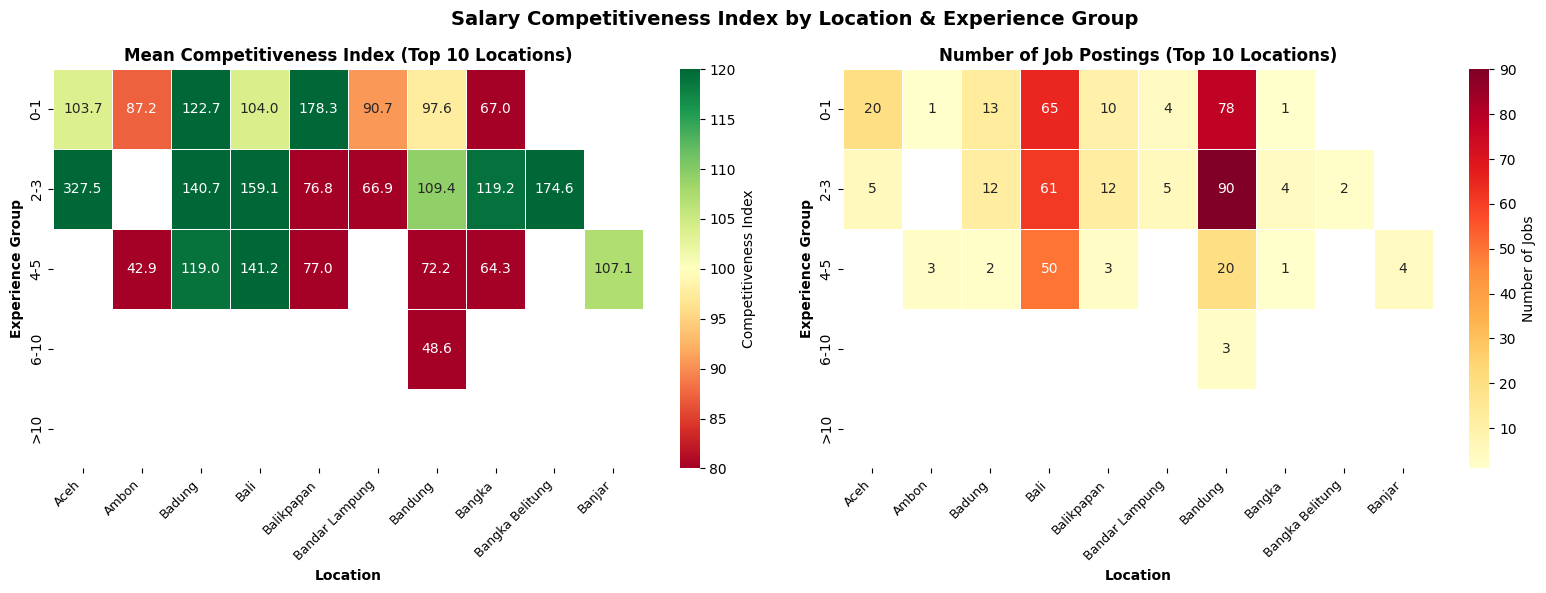

✓ Grafik 2 berhasil dibuat: salary_competitiveness_heatmap.png


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Salary Competitiveness Index by Location & Experience Group', fontsize=14, fontweight='bold')

# Create pivot table
pivot_data = df.pivot_table(values='salary_competitiveness_index',
                             index='experience_group',
                             columns='location',
                             aggfunc='mean')

# Heatmap 1: Mean Index (top 10 locations)
ax1 = axes[0]
pivot_data_top = pivot_data.iloc[:, :10]  # Top 10 locations
sns.heatmap(pivot_data_top, annot=True, fmt='.1f', cmap='RdYlGn', center=100,
            cbar_kws={'label': 'Competitiveness Index'}, ax=ax1, vmin=80, vmax=120, linewidths=0.5)
ax1.set_title('Mean Competitiveness Index (Top 10 Locations)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Experience Group', fontweight='bold')
ax1.set_xlabel('Location', fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=9)

# Heatmap 2: Job Count
ax2 = axes[1]
pivot_count = df.pivot_table(values='salary_competitiveness_index',
                              index='experience_group',
                              columns='location',
                              aggfunc='count')
pivot_count_top = pivot_count.iloc[:, :10]
sns.heatmap(pivot_count_top, annot=True, fmt='g', cmap='YlOrRd',
            cbar_kws={'label': 'Number of Jobs'}, ax=ax2, linewidths=0.5)
ax2.set_title('Number of Job Postings (Top 10 Locations)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Experience Group', fontweight='bold')
ax2.set_xlabel('Location', fontweight='bold')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.savefig('salary_competitiveness_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 2 berhasil dibuat: salary_competitiveness_heatmap.png")

## Pekerjaan dengan gaji kompetitif dan gaji tidak kompetitif

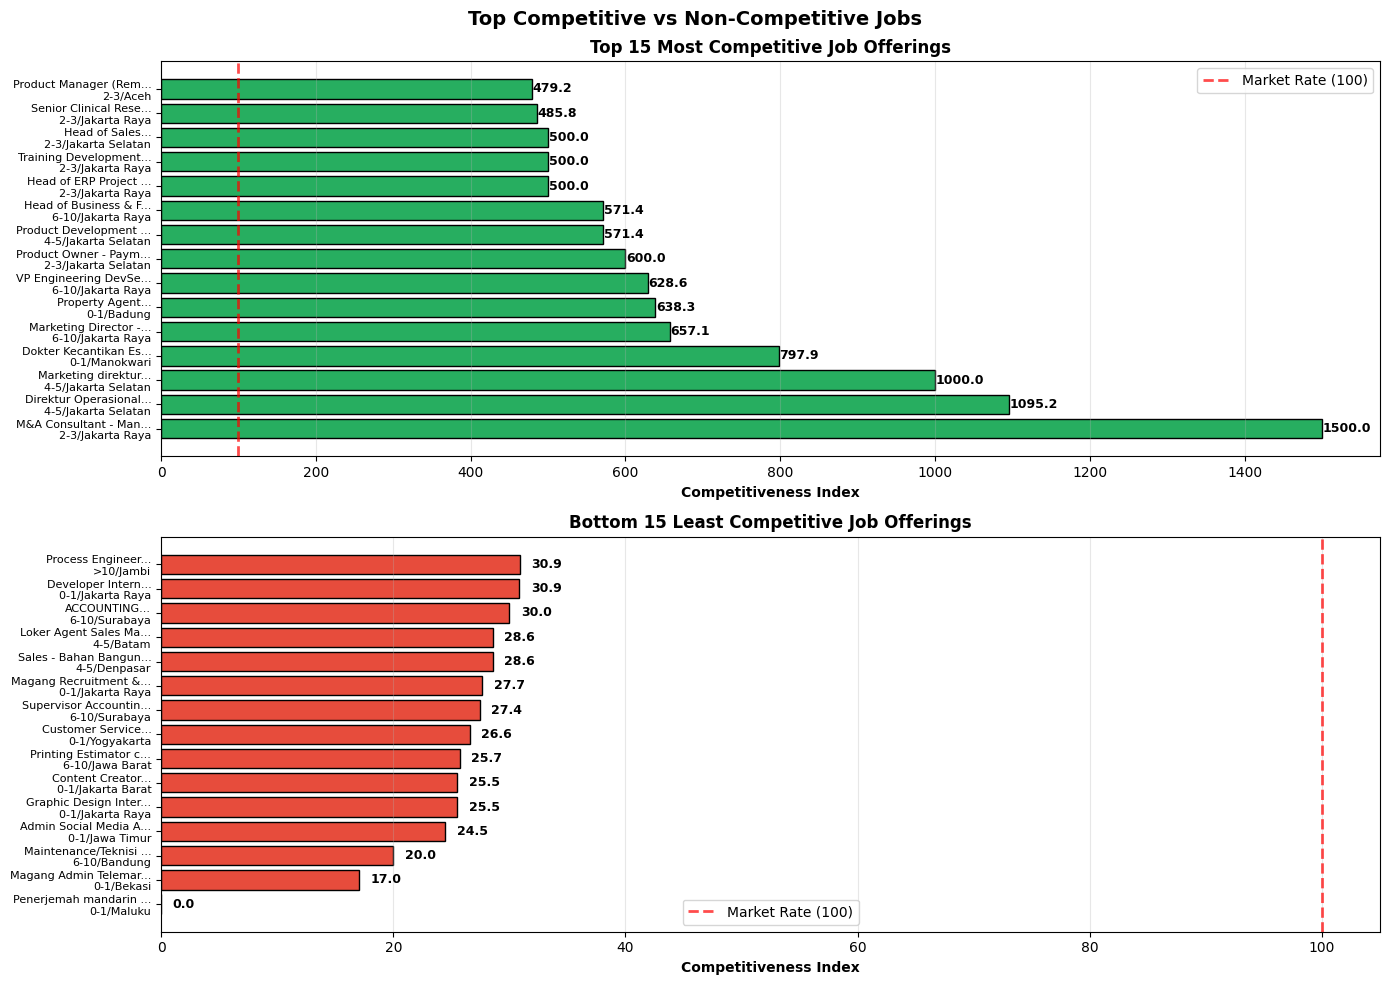

✓ Grafik 3 berhasil dibuat: salary_competitiveness_top_bottom.png


In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Top Competitive vs Non-Competitive Jobs', fontsize=14, fontweight='bold')

# Top 15 most competitive jobs
top_competitive = df.nlargest(15, 'salary_competitiveness_index')[['job_title', 'salary_competitiveness_index', 'experience_group', 'location']]
ax1 = axes[0]
y_pos = np.arange(len(top_competitive))
bars1 = ax1.barh(y_pos, top_competitive['salary_competitiveness_index'].values, color='#27ae60', edgecolor='black')
ax1.axvline(100, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Market Rate (100)')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"{job[:20]}...\n{exp}/{loc[:15]}"
                      for job, exp, loc in zip(top_competitive['job_title'], top_competitive['experience_group'], top_competitive['location'])],
                     fontsize=8)
ax1.set_xlabel('Competitiveness Index', fontweight='bold')
ax1.set_title('Top 15 Most Competitive Job Offerings', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars1, top_competitive['salary_competitiveness_index'].values)):
    ax1.text(val + 1, i, f'{val:.1f}', va='center', fontweight='bold', fontsize=9)

# Bottom 15 least competitive jobs
bottom_competitive = df.nsmallest(15, 'salary_competitiveness_index')[['job_title', 'salary_competitiveness_index', 'experience_group', 'location']]
ax2 = axes[1]
y_pos = np.arange(len(bottom_competitive))
bars2 = ax2.barh(y_pos, bottom_competitive['salary_competitiveness_index'].values, color='#e74c3c', edgecolor='black')
ax2.axvline(100, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Market Rate (100)')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([f"{job[:20]}...\n{exp}/{loc[:15]}"
                      for job, exp, loc in zip(bottom_competitive['job_title'], bottom_competitive['experience_group'], bottom_competitive['location'])],
                     fontsize=8)
ax2.set_xlabel('Competitiveness Index', fontweight='bold')
ax2.set_title('Bottom 15 Least Competitive Job Offerings', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars2, bottom_competitive['salary_competitiveness_index'].values)):
    ax2.text(val + 1, i, f'{val:.1f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('salary_competitiveness_top_bottom.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 3 berhasil dibuat: salary_competitiveness_top_bottom.png")

## Pekerjaan dengan salary tinggi berdasarkan pengalaman kerja


MEMBUAT VISUALISASI TOP 10 JOBS PER EXPERIENCE LEVEL


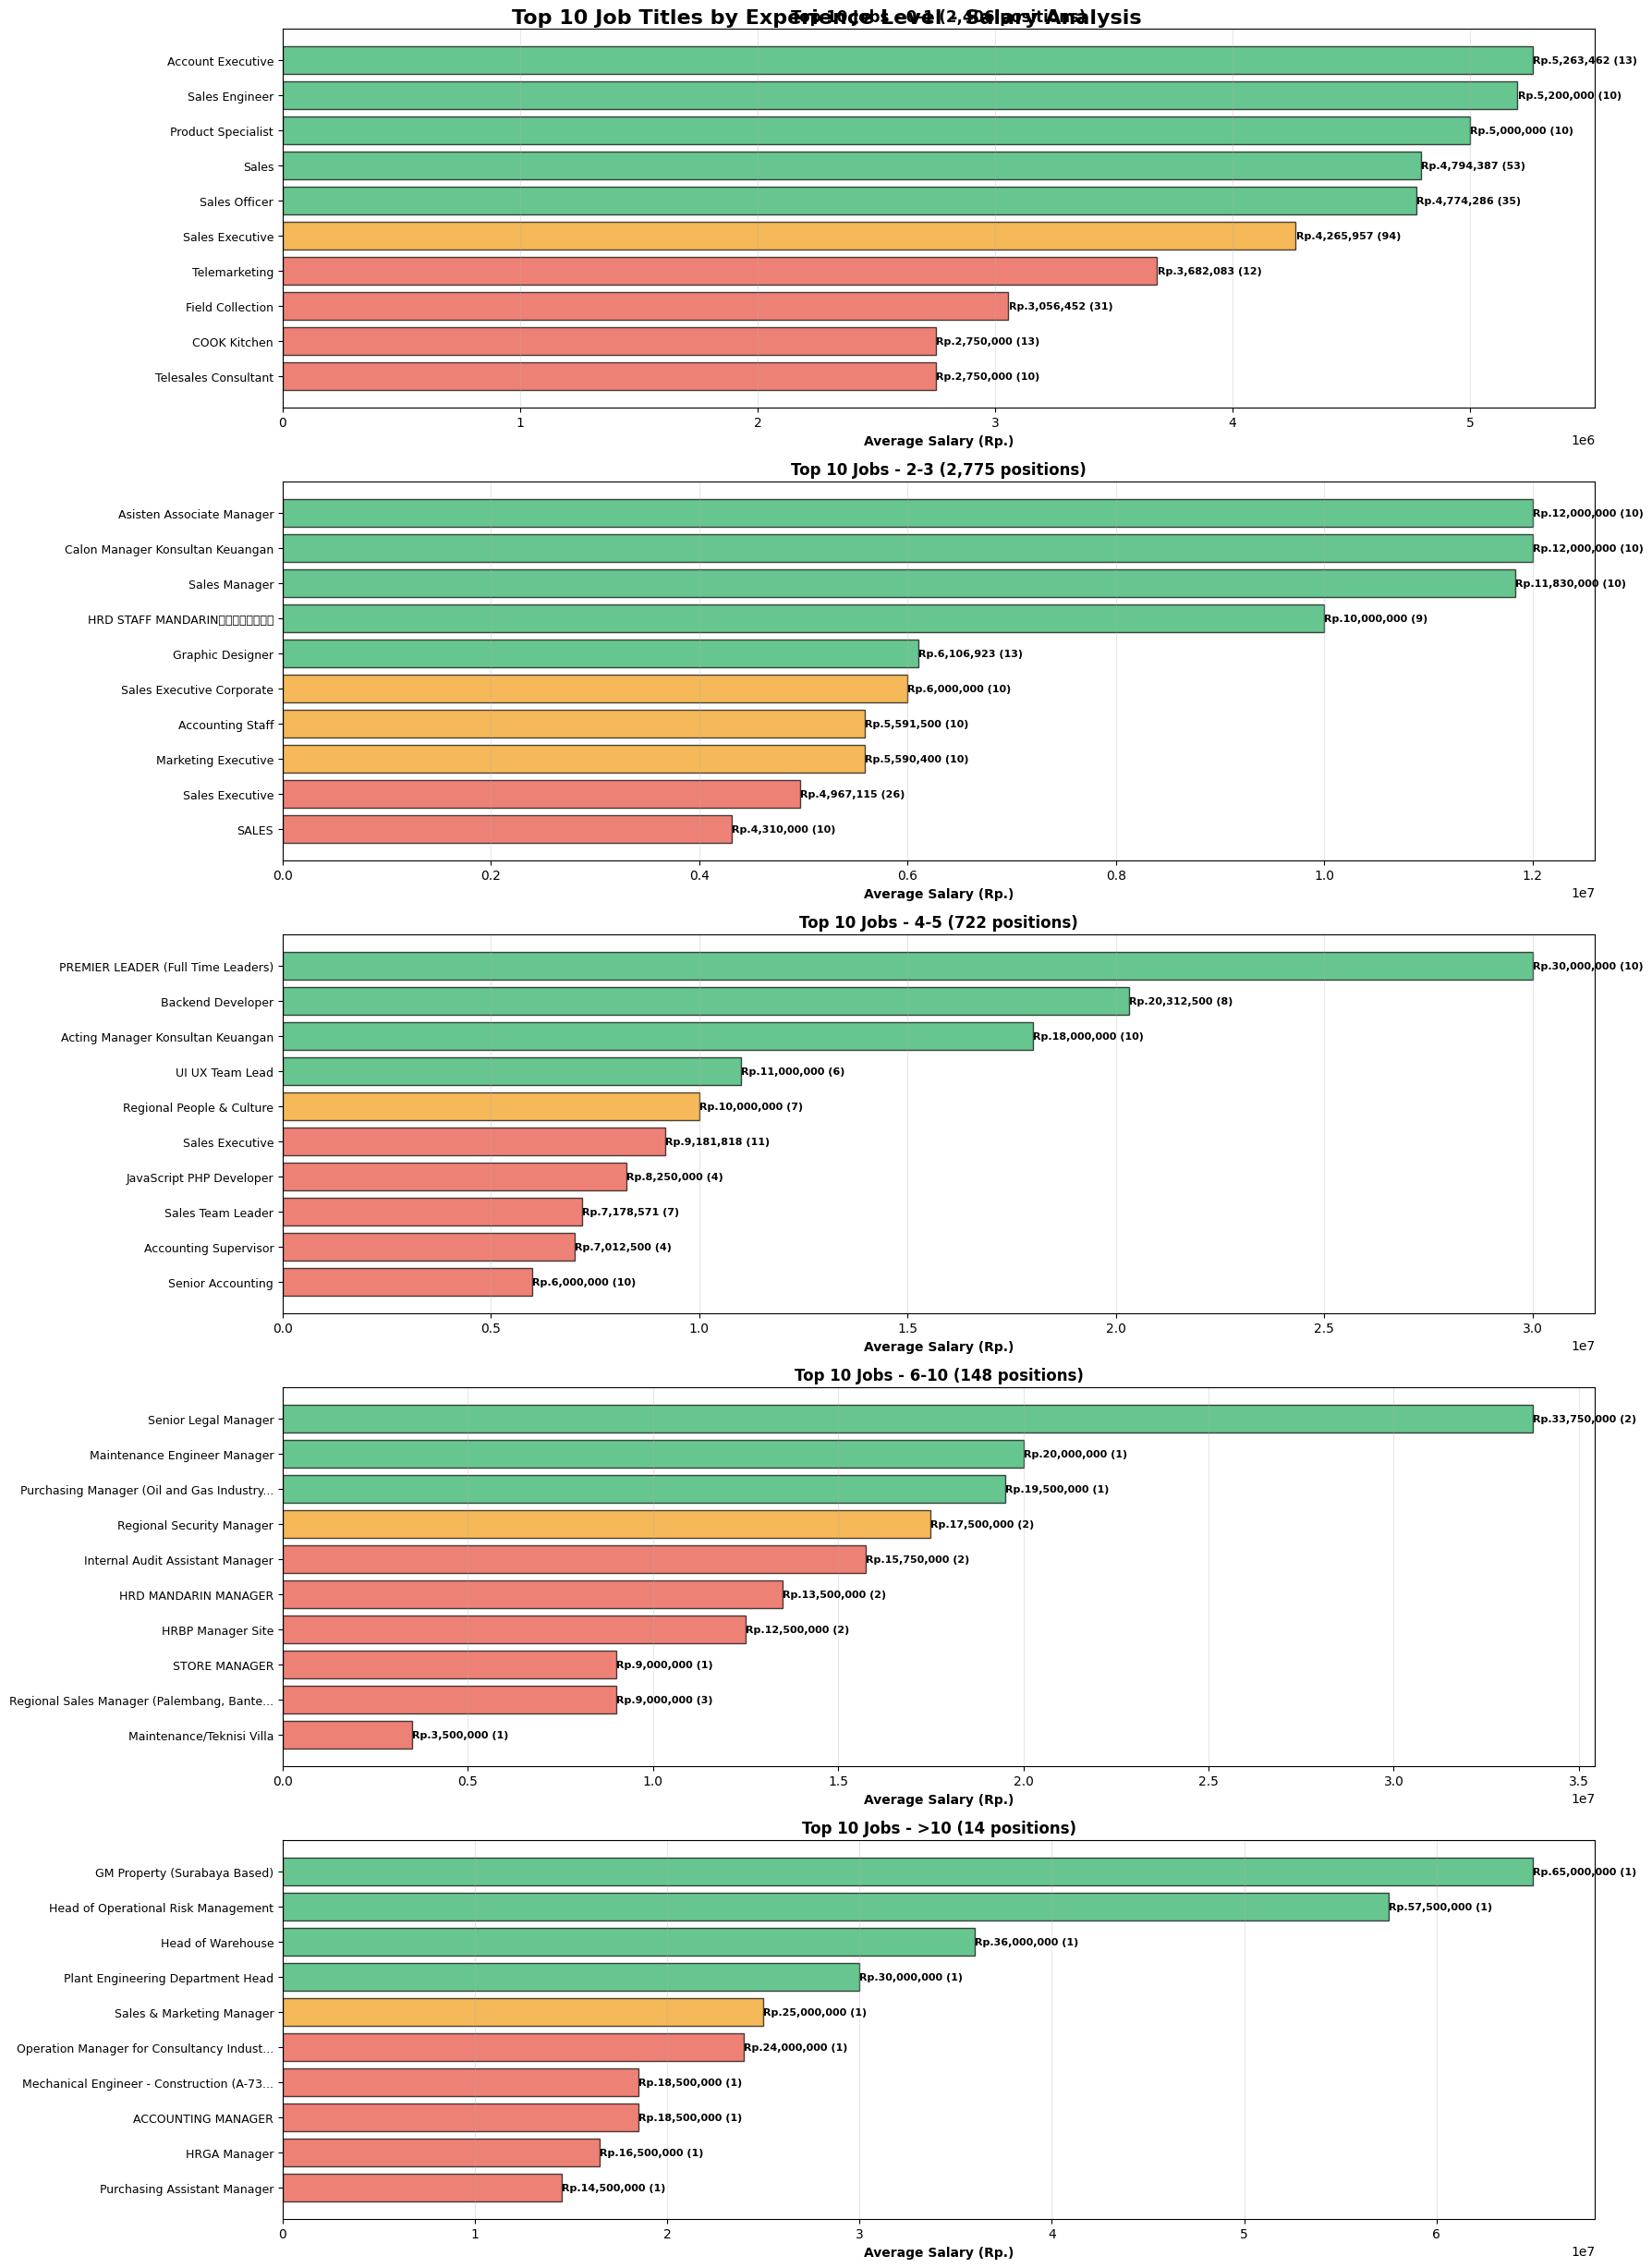

✓ Grafik 1 berhasil dibuat: top_jobs_by_experience_salary.png


In [ ]:
print("\n" + "=" * 100)
print("MEMBUAT VISUALISASI TOP 10 JOBS PER EXPERIENCE LEVEL")
print("=" * 100)

experience_levels = sorted(df['experience_group'].unique())

# Create visualization for each experience level
num_experience_levels = len(experience_levels)
fig = plt.figure(figsize=(18, 5 * num_experience_levels))
fig.suptitle('Top 10 Job Titles by Experience Level - Salary Analysis', fontsize=16, fontweight='bold', y=0.98)

fig.subplots_adjust(top=0.92)

for idx, exp_level in enumerate(experience_levels):
    exp_data = df[df['experience_group'] == exp_level]
    top_jobs = exp_data['job_title'].value_counts().head(10)

    # Calculate stats for each job
    job_stats = []
    for job_title in top_jobs.index:
        job_data = exp_data[exp_data['job_title'] == job_title]
        job_stats.append({
            'job_title': job_title,
            'avg_salary': job_data['salary'].mean(),
            'count': len(job_data),
            'competitiveness': job_data['salary_competitiveness_index'].mean()
        })

    job_stats_df = pd.DataFrame(job_stats).sort_values('avg_salary', ascending=True)

    # Create horizontal bar chart
    ax = plt.subplot(num_experience_levels, 1, idx + 1)

    # Color based on competitiveness
    colors = ['#27ae60' if x > 100 else '#f39c12' if x > 90 else '#e74c3c'
              for x in job_stats_df['competitiveness']]

    bars = ax.barh(range(len(job_stats_df)), job_stats_df['avg_salary'],
                    color=colors, edgecolor='black', alpha=0.7)

    ax.set_yticks(range(len(job_stats_df)))
    ax.set_yticklabels([f"{title[:40]}..." if len(title) > 40 else title
                        for title in job_stats_df['job_title']], fontsize=9)
    ax.set_xlabel('Average Salary (Rp.)', fontweight='bold', fontsize=10)
    ax.set_title(f'Top 10 Jobs - {exp_level} ({len(exp_data):,} positions)',
                fontweight='bold', fontsize=12)
    ax.grid(axis='x', alpha=0.3)

    # Add salary labels
    for i, (bar, salary, count) in enumerate(zip(bars, job_stats_df['avg_salary'], job_stats_df['count'])):
        ax.text(salary + 1000, i, f'Rp.{salary:,.0f} ({count})',
               va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.savefig('top_jobs_by_experience_salary.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 1 berhasil dibuat: top_jobs_by_experience_salary.png")

In [ ]:
df.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,company_process_time,company_size,company_industry,salary,experience_years,experience_group,range_gaji,median_salary_by_level,salary_competitiveness_index,median_salary_by_location,salary_vs_location
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,0 tahun,Diploma (D3/D4),Penuh Waktu,"Manufaktur,Manufaktur",18 days,51 - 200 pekerja,Manufaktur/Produksi,10500000.0,0,0-1,10 - 20 juta,4700000.0,223.40,5760000.0,182.29
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3 tahun,Diploma (D3/D4),Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,8000000.0,3,2-3,5 - 10 juta,6000000.0,133.33,5000000.0,160.00
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Diploma (D3/D4),Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",29 days,1- 50 pekerja,Elektrikal & Elektronik,5250000.0,2,2-3,5 - 10 juta,6000000.0,87.50,4700000.0,111.70
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2 tahun,Tidak Terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",15000000.0,2,2-3,10 - 20 juta,6000000.0,250.00,6000000.0,250.00
31,32,PPIC,Tangerang,IDR,Manajer/Asisten Manajer,5 tahun,Sarjana (S1),Penuh Waktu,"Manufaktur,Manufaktur",21 days,201 - 500 pekerja,Manufaktur/Produksi,6600000.0,5,4-5,5 - 10 juta,10500000.0,62.86,5500000.0,120.00


In [ ]:
from google.colab import files

# Simpan DataFrame ke file CSV
df.to_csv('data_output.csv', index=False)

# Download ke komputer
files.download('data_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>